In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import os
import kagglehub

In [5]:
!pip install kagglehub pandas
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
import os
import kagglehub
# Download dataset
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

dataset_files = os.listdir(path)
print("Dataset files:", dataset_files)

# Load CSV file into DataFrame
csv_file = [f for f in dataset_files if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv_file))

Dataset files: ['creditcard.csv']


In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 1081


In [11]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()
print(f"Data after removing duplicates: {df_cleaned.shape[0]} rows")

Data after removing duplicates: 283726 rows


In [ ]:
duplicates = df_cleaned[df_cleaned.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 0


In [ ]:
df_cleaned.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


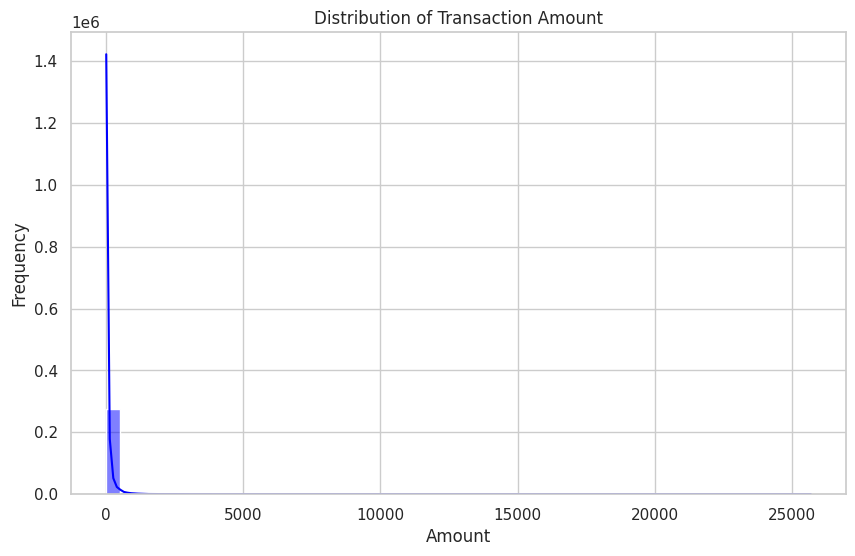

In [ ]:
sns.set(style="whitegrid")

# Plot histogram of 'Amount'
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Amount'], kde=True, color='blue', bins=50)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

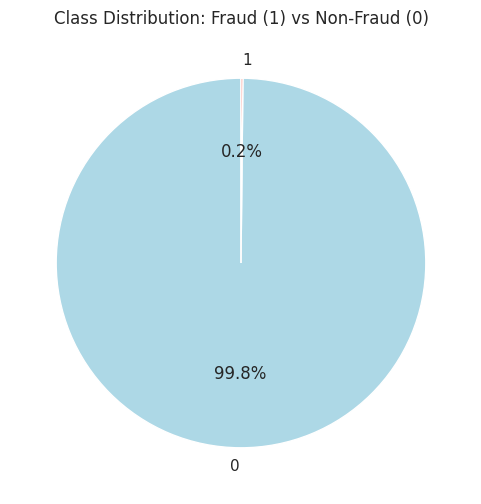

In [ ]:
# Class distribution
class_distribution = df_cleaned['Class'].value_counts()

plt.figure(figsize=(6, 6))
class_distribution.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90)
plt.title('Class Distribution: Fraud (1) vs Non-Fraud (0)')
plt.ylabel('')
plt.show()

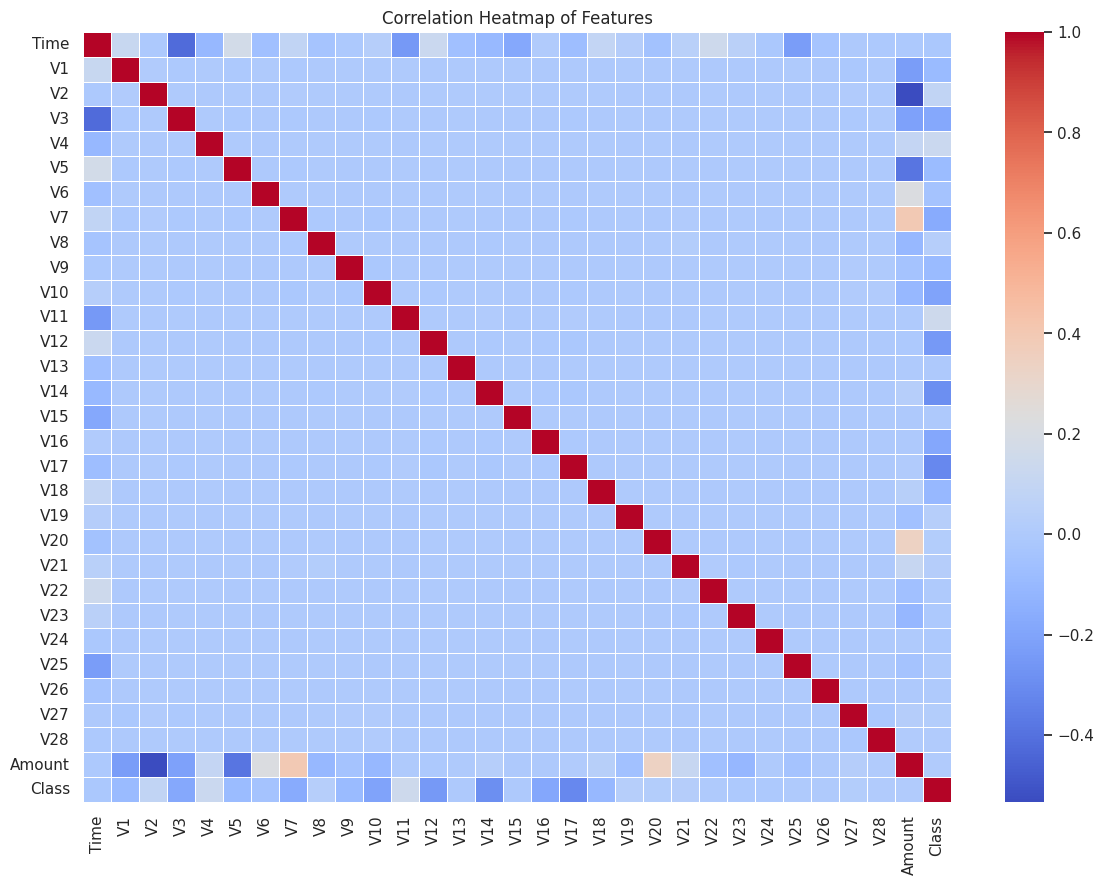

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot heatmap of feature correlations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

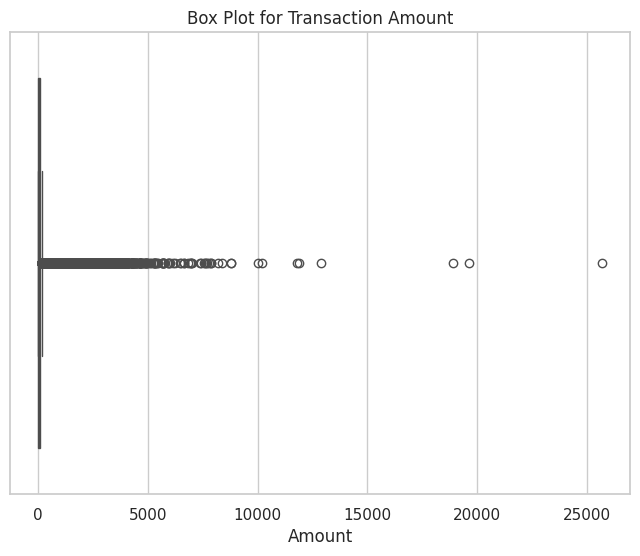

In [ ]:
# Plot box plot for 'Amount'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Amount'], color='orange')
plt.title('Box Plot for Transaction Amount')
plt.xlabel('Amount')
plt.show()

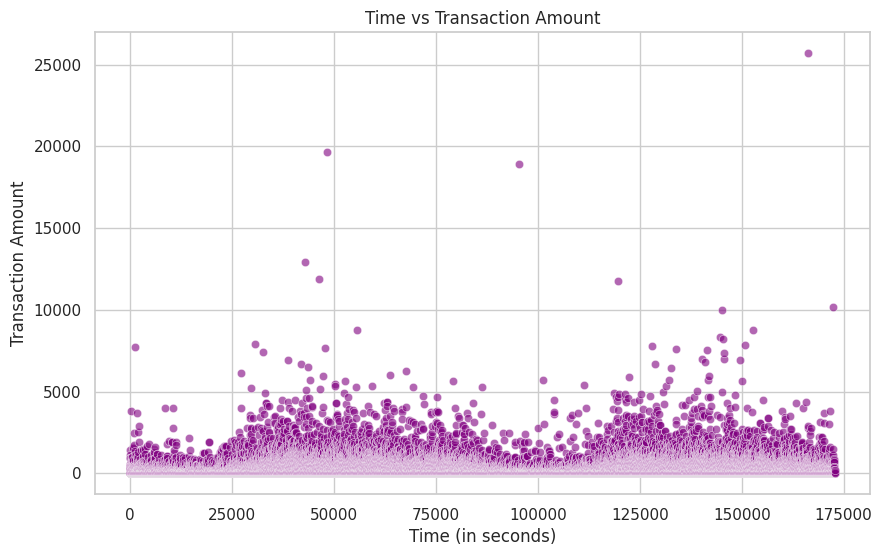

In [ ]:
# Scatter plot of 'Time' vs 'Amount'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['Time'], y=df_cleaned['Amount'], color='purple', alpha=0.6)
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (in seconds)')
plt.ylabel('Transaction Amount')
plt.show()

<ipython-input-18-a98e10607ead>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y='Time', data=df_cleaned, palette='muted')


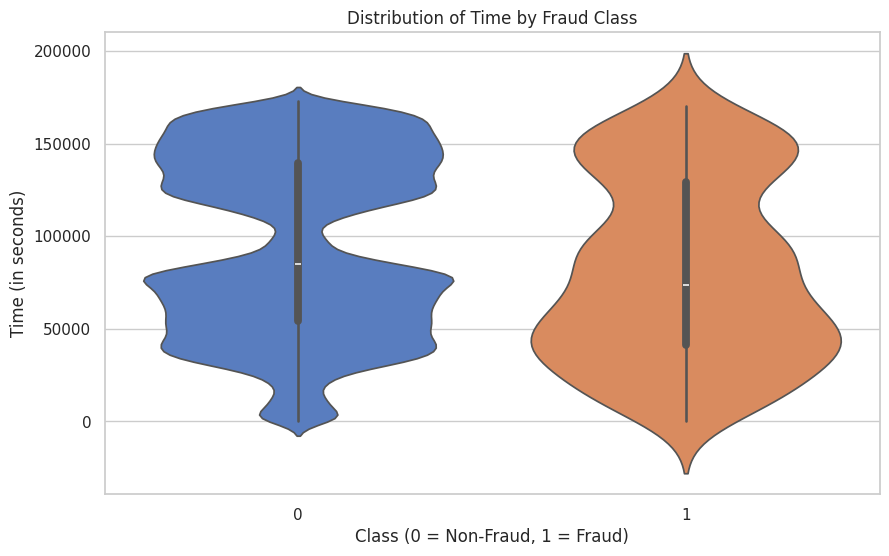

In [ ]:
# Violin plot of 'Time' distribution by 'Class'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Time', data=df_cleaned, palette='muted')
plt.title('Distribution of Time by Fraud Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Time (in seconds)')
plt.show()

<ipython-input-19-224f285ff2bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df_cleaned, palette='coolwarm')


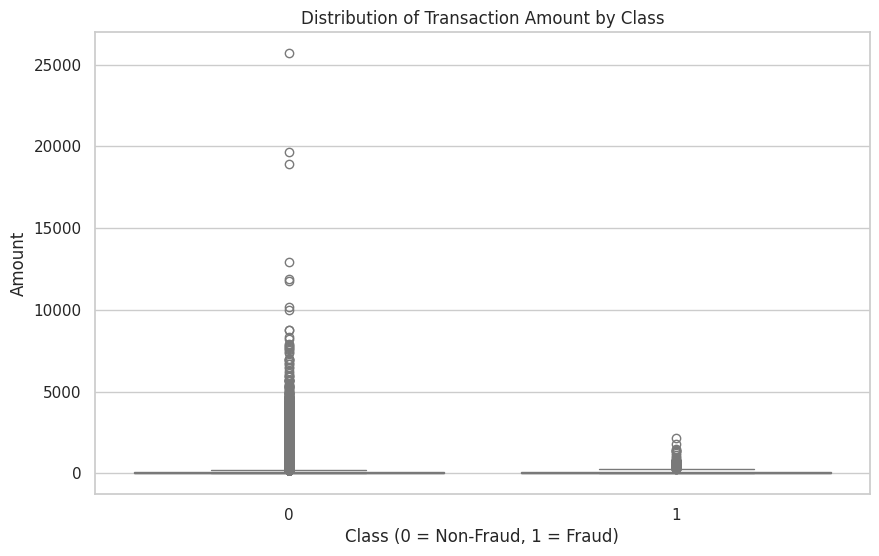

In [ ]:
# Box plot of 'Amount' distribution by 'Class'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df_cleaned, palette='coolwarm')
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Amount')
plt.show()

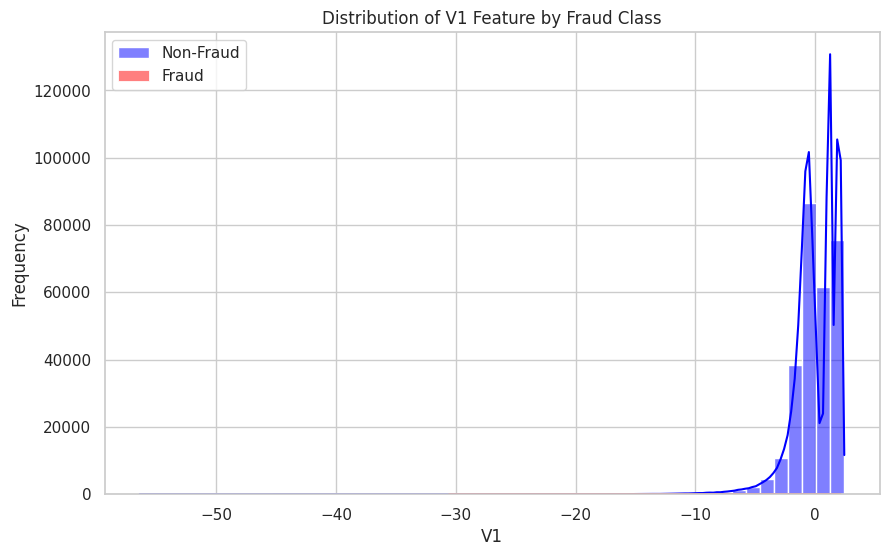

In [ ]:
# Histogram of 'V1' for both classes (Fraud and Non-Fraud)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[df_cleaned['Class'] == 0]['V1'], color='blue', kde=True, label='Non-Fraud', bins=50)
sns.histplot(df_cleaned[df_cleaned['Class'] == 1]['V1'], color='red', kde=True, label='Fraud', bins=50)
plt.title('Distribution of V1 Feature by Fraud Class')
plt.xlabel('V1')
plt.ylabel('Frequency')
plt.legend()
plt.show()

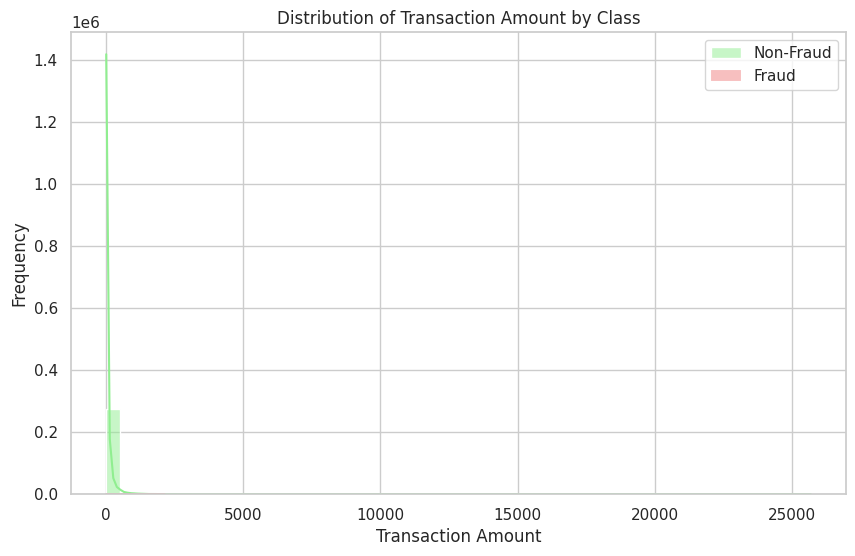

In [ ]:
# Histogram of 'Amount' for both classes (Fraud and Non-Fraud)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[df_cleaned['Class'] == 0]['Amount'], color='lightgreen', kde=True, label='Non-Fraud', bins=50)
sns.histplot(df_cleaned[df_cleaned['Class'] == 1]['Amount'], color='lightcoral', kde=True, label='Fraud', bins=50)
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**To address the class imbalance in the dataset, I applied SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class (fraudulent transactions) and balance the class distribution.**

Original class distribution:
 Class
0    283253
1       473
Name: count, dtype: int64

Resampled class distribution:
 Class
0    283253
1    283253
Name: count, dtype: int64


<ipython-input-12-77e46fb6b433>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='Set2')


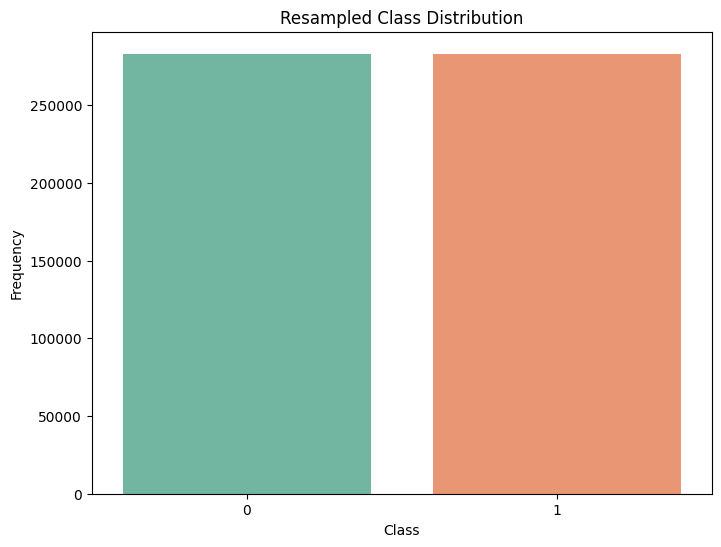

In [12]:
# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Separate features and target
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

# Print original class distribution
print("Original class distribution:\n", y.value_counts())

# Apply SMOTE to balance the class distribution
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print resampled class distribution
print("\nResampled class distribution:\n", y_resampled.value_counts())

# Plot the resampled class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette='Set2')
plt.title('Resampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# **Feature Importance**

In [13]:
# Separate features and target
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SelectKBest (Chi-Square Test)
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(abs(X_scaled), y)
selected_features = X.columns[selector.get_support()]
print("Top 10 selected features using SelectKBest:", list(selected_features))

Top 10 selected features using SelectKBest: ['V3', 'V4', 'V7', 'V8', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']


In [14]:
# Feature Importance using RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_scaled, y)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print("\nTop features based on RandomForest Importance:\n", feature_importance_df.head(10))


Top features based on RandomForest Importance:
    Feature  Importance
17     V17    0.154219
14     V14    0.136456
12     V12    0.123372
10     V10    0.087651
16     V16    0.068716
11     V11    0.050253
9       V9    0.035881
18     V18    0.030688
7       V7    0.027981
4       V4    0.026054


In [15]:
selected_features = ['V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']

# Create a new dataset with selected features
X_selected = pd.DataFrame(X_scaled, columns=X.columns)[selected_features]

# Check the new shape of the dataset
print("Shape of X_selected:", X_selected.shape)

Shape of X_selected: (283726, 8)


In [16]:
# Define the selected features
selected_features = ['V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']

# Create a new dataset with selected features from scaled data
X_selected = pd.DataFrame(X_scaled, columns=X.columns)[selected_features]

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)
# Check if the shapes match
print(f"Shape of X_resampled: {X_resampled.shape}")
print(f"Shape of y_resampled: {y_resampled.shape}")

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Shape of X_resampled: (566506, 8)
Shape of y_resampled: (566506,)


# **Decision Tree model**

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

Confusion Matrix:
 [[56280   183]
 [   74 56765]]
Accuracy: 0.9977317258300824


# **cross-validation on Decision Tree Classifier**

In [ ]:
# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation on the resampled data
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Display the results
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.9952075  0.99743162 0.99740514 0.99710506 0.99780231]
Average cross-validation score: 0.996990326285737


# **XGBoost model**

In [18]:
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the resampled data
xgb_model.fit(X_resampled, y_resampled)

# Predict on the resampled dataset
y_pred_xgb = xgb_model.predict(X_resampled)

# Classification Report
print("Classification Report:\n", classification_report(y_resampled, y_pred_xgb))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_resampled, y_pred_xgb))

# Accuracy
accuracy = accuracy_score(y_resampled, y_pred_xgb)
print(f"Accuracy: {accuracy}")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       1.00      1.00      1.00    283253

    accuracy                           1.00    566506
   macro avg       1.00      1.00      1.00    566506
weighted avg       1.00      1.00      1.00    566506

Confusion Matrix:
 [[282587    666]
 [    88 283165]]
Accuracy: 0.9986690343968113


# **KNN classifier**

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the resampled data
knn_model.fit(X_resampled, y_resampled)

# Predict on the resampled dataset
y_pred_knn = knn_model.predict(X_resampled)

# Classification Report
print("Classification Report for KNN:\n", classification_report(y_resampled, y_pred_knn))

# Confusion Matrix
print("Confusion Matrix for KNN:\n", confusion_matrix(y_resampled, y_pred_knn))

# Accuracy
accuracy_knn = accuracy_score(y_resampled, y_pred_knn)
print(f"Accuracy for KNN: {accuracy_knn}")

Classification Report for KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       1.00      1.00      1.00    283253

    accuracy                           1.00    566506
   macro avg       1.00      1.00      1.00    566506
weighted avg       1.00      1.00      1.00    566506

Confusion Matrix for KNN:
 [[282483    770]
 [     0 283253]]
Accuracy for KNN: 0.9986407910948869


# **Saving the Models**

In [20]:
import joblib

# Save the Decision Tree model
joblib.dump(dt_model, '/content/dt_model.pkl')

# Save the XGBoost model
joblib.dump(xgb_model, '/content/xgb_model.pkl')

# Save the KNN model
joblib.dump(knn_model, '/content/knn_model.pkl')

print("Models saved successfully.")

Models saved successfully.


In [21]:
import joblib
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on your training data
scaler.fit(X_train)

# Save the scaler
joblib.dump(scaler, '/content/scaler.pkl')

['/content/scaler.pkl']

# **Real-Time Fraud Detection Prediction System with Model Selection**

In [22]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import joblib

# Load the scaler and models
scaler = joblib.load('/content/scaler.pkl')
dt_model = joblib.load('/content/dt_model.pkl')
xgb_model = joblib.load('/content/xgb_model.pkl')
knn_model = joblib.load('/content/knn_model.pkl')

# Selected features used in the model
selected_features = ['V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']

In [23]:
# Create widgets for user input with better layout, color schemes, but default width
input_style = {'description_width': 'initial'}

V4_input = widgets.FloatText(value=0.0, description="V4:", style=input_style)
V7_input = widgets.FloatText(value=0.0, description="V7:", style=input_style)
V10_input = widgets.FloatText(value=0.0, description="V10:", style=input_style)
V11_input = widgets.FloatText(value=0.0, description="V11:", style=input_style)
V12_input = widgets.FloatText(value=0.0, description="V12:", style=input_style)
V14_input = widgets.FloatText(value=0.0, description="V14:", style=input_style)
V16_input = widgets.FloatText(value=0.0, description="V16:", style=input_style)
V17_input = widgets.FloatText(value=0.0, description="V17:", style=input_style)

model_choice_widget = widgets.Dropdown(
    options=['Decision Tree', 'XGBoost', 'KNN'],
    value='Decision Tree',
    description='Model:',
    style={'description_width': 'initial'}
)

# Output widget to display predictions
output = widgets.Output()

# Function to predict and display results when button is clicked
def predict_model(V4, V7, V10, V11, V12, V14, V16, V17, model_choice):
    with output:
        # Create a dataframe from the input values
        input_data = pd.DataFrame({
            'V4': [V4],
            'V7': [V7],
            'V10': [V10],
            'V11': [V11],
            'V12': [V12],
            'V14': [V14],
            'V16': [V16],
            'V17': [V17]
        })

        # Ensure input_data is in the same feature order as the model training data
        input_data = input_data[selected_features]

        # Check if there are any zero values in the input data (excluding valid non-zero inputs)
        if (input_data == 0).any(axis=None):
            zero_inputs = input_data[input_data == 0].count()
            if zero_inputs.sum() == 8:
                show_feedback("⚠️ Warning: All inputs are set to zero. Please provide valid transaction values.")
                return

        # Scale the input data using the fitted scaler
        input_data_scaled = scaler.transform(input_data)

        # Choose the model based on user input
        if model_choice == 'Decision Tree':
            model = dt_model
        elif model_choice == 'XGBoost':
            model = xgb_model
        elif model_choice == 'KNN':
            model = knn_model

        # Make the prediction
        prediction = model.predict(input_data_scaled)

        # Display the prediction
        if prediction[0] == 1:
            show_feedback("🚨 Prediction: Fraudulent!")
        else:
            show_feedback("✅ Prediction: Non-fraudulent")

# Function to trigger prediction on button click
def on_button_click(b):
    # Get the values from the widgets
    V4 = V4_input.value
    V7 = V7_input.value
    V10 = V10_input.value
    V11 = V11_input.value
    V12 = V12_input.value
    V14 = V14_input.value
    V16 = V16_input.value
    V17 = V17_input.value
    model_choice = model_choice_widget.value

    # Call the prediction function
    predict_model(V4, V7, V10, V11, V12, V14, V16, V17, model_choice)

In [24]:
# Create a button for making the prediction with custom styling
predict_button = widgets.Button(description="Predict", button_style='success')
predict_button.on_click(on_button_click)

# Create a heading with a bold and larger font size
heading = widgets.HTML(value="<h2 style='text-align:center; color:#FF5722; font-family:Arial, sans-serif;'>Fraud Detection Prediction</h2>")

# Customizing the layout of input fields
input_widgets = widgets.VBox([
    heading,
    V4_input, V7_input, V10_input, V11_input, V12_input, V14_input, V16_input, V17_input,
    model_choice_widget, predict_button
])

# Customizing the output area
output.layout.height = '150px'
output.layout.border = '2px solid #FF5722'
output.layout.padding = '10px'
output.layout.margin = '10px'
output.layout.background_color = '#f9f9f9'

# Adding a feedback message when prediction happens
def show_feedback(msg):
    with output:
        print(msg)

display(input_widgets, output)

Output(layout=Layout(border='2px solid #FF5722', height='150px', margin='10px', padding='10px'))